<a href="https://colab.research.google.com/github/Aayush121202/Reinforcement_Learning/blob/main/Gambler's_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Policy iteration 1 completed, delta 0.9533440000000001
Policy iteration 2 completed, delta 0.3688960000000001
Policy iteration 3 completed, delta 0.13926400000000005
Policy iteration 4 completed, delta 0.05570560000000002
Policy iteration 5 completed, delta 0.02228224000000001
Policy iteration 6 completed, delta 0.008912896000000003
Policy iteration 7 completed, delta 0.0016384000000000008
Policy iteration 8 completed, delta 0.0003932160000000005
Policy iteration 9 completed, delta 7.602595430399994e-05
Policy iteration 10 completed, delta 3.041038172160032e-05
Policy iteration 11 completed, delta 2.6418075402233343e-06
Policy iteration 12 completed, delta 9.045549017728909e-07
Policy iteration 13 completed, delta 7.815354352569415e-08
Policy iteration 14 completed, delta 1.8756850440893036e-08
Policy iteration 15 completed, delta 5.230363003816407e-09
Policy iteration 16 completed, delta 1.869841788348925e-09
Policy iteration 17 completed, delta 7.479367151660976e-10
Policy iteration 

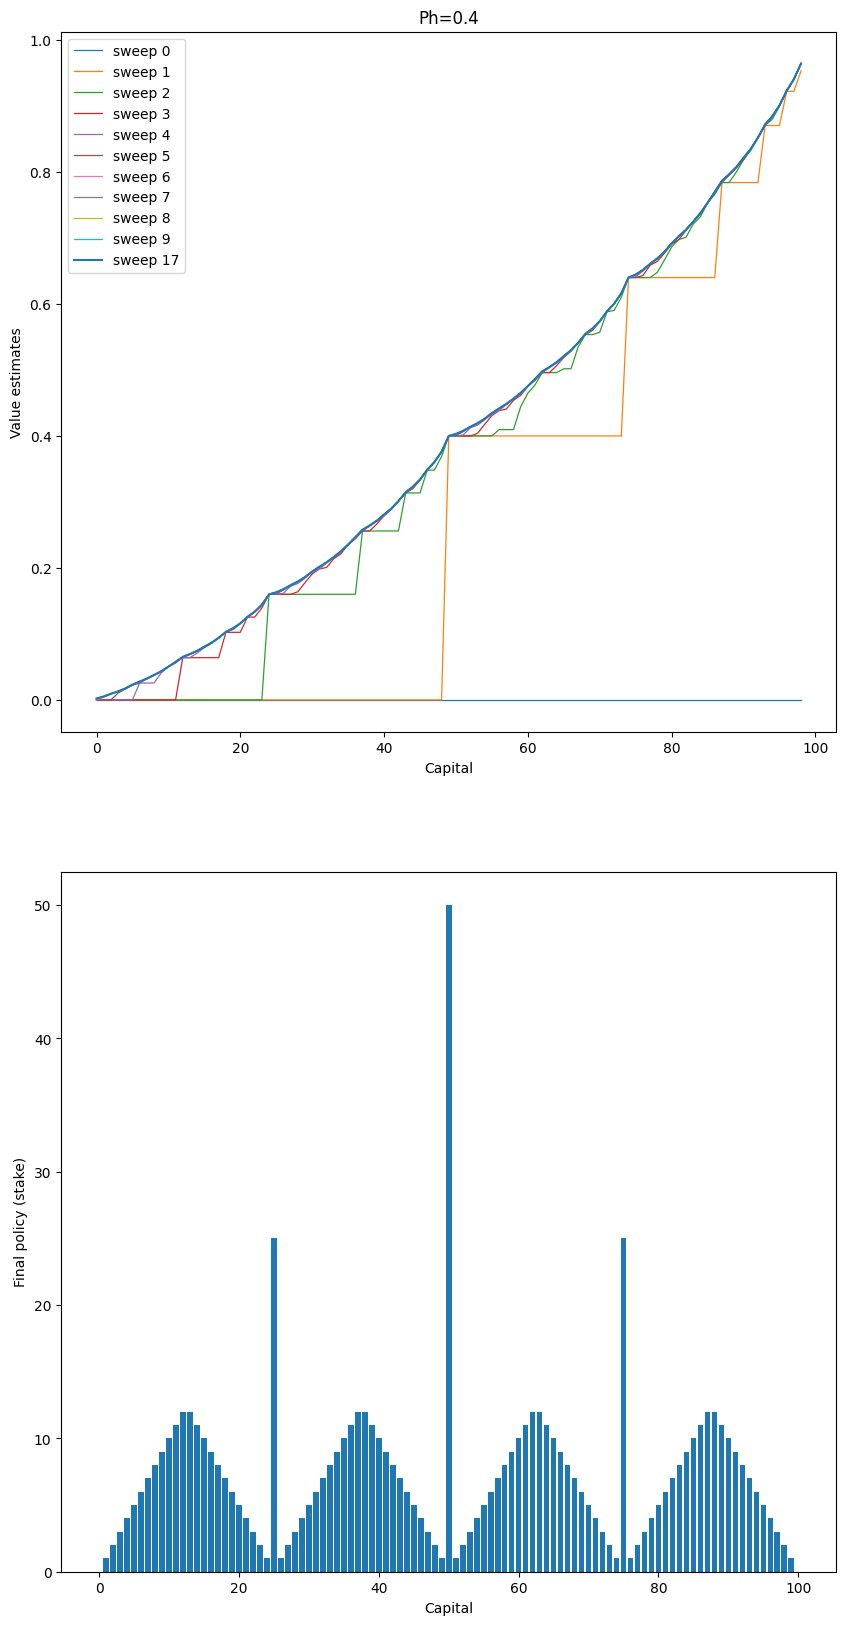

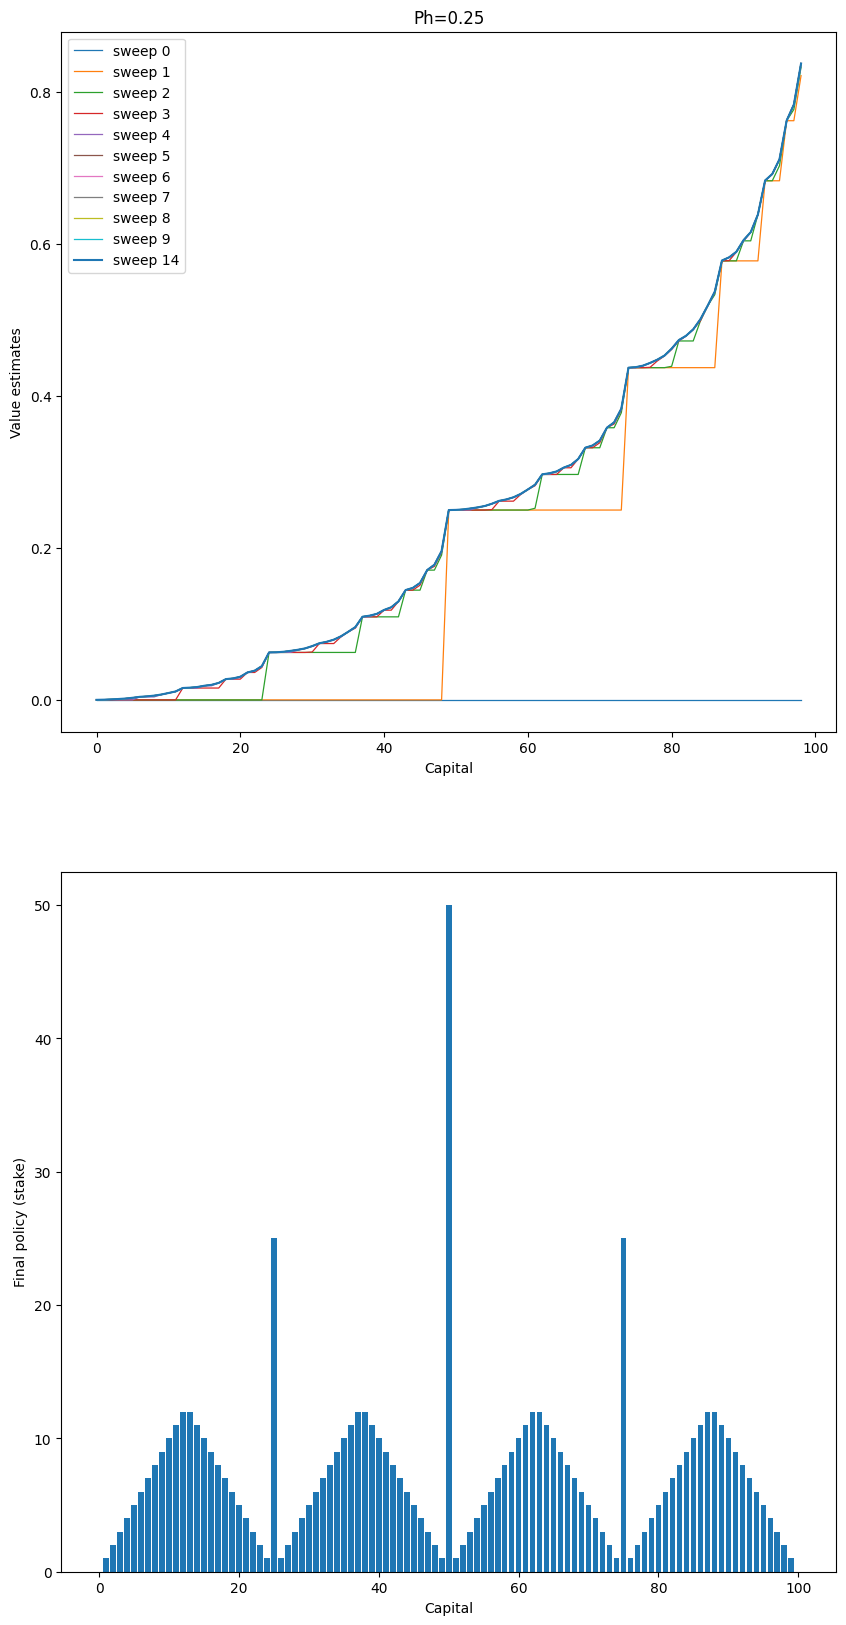

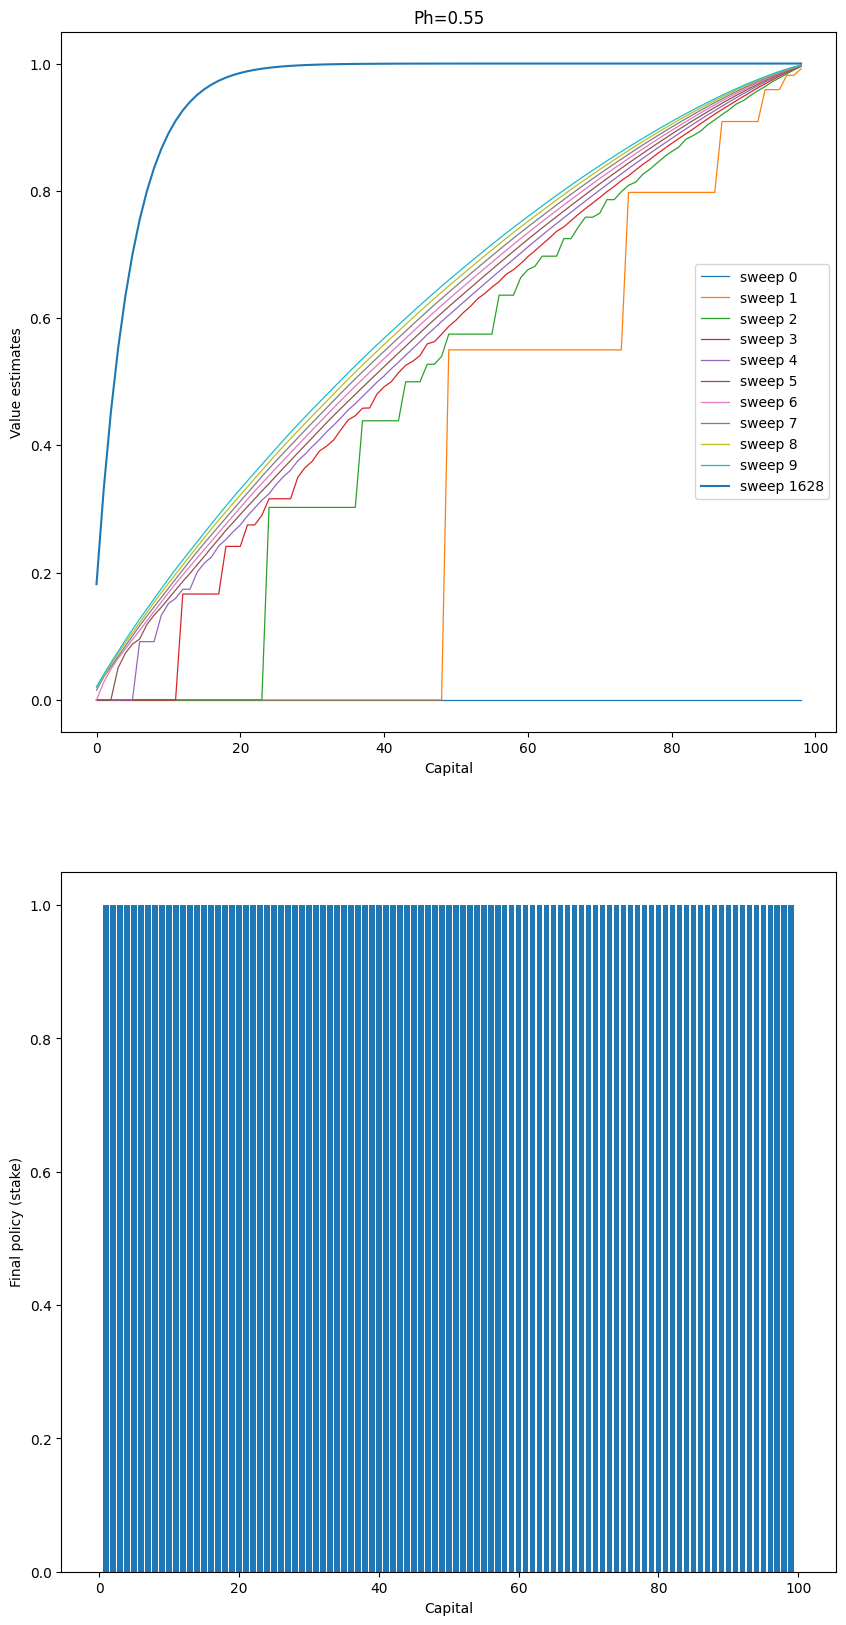

In [7]:
import matplotlib.pyplot as plt
import numpy as np

TARGET_VALUE = 100
PR_H = 0.4
GAMMA = 1


def states():
    for s in range(1, TARGET_VALUE):
        yield s


def step(action, state, V):
    action_return = 0

    # success
    sp = min(state + action, TARGET_VALUE)
    action_return += PR_H * ((sp == TARGET_VALUE) + GAMMA * V[sp])

    # fail
    sp = max(state - action, 0)
    action_return += (1 - PR_H) * (GAMMA * V[sp])

    return action_return


def value_iteration(file_name='figure_4_3.png'):
    V = np.zeros(TARGET_VALUE + 1)
    pi = np.empty(TARGET_VALUE + 1, dtype=int)
    pi[0] = 0
    pi[TARGET_VALUE] = 0

    theta = 1e-9
    delta = 1
    iteration = 0
    value_function_history = []

    while delta > theta:
        iteration += 1
        delta = 0
        value_function_history.append(V.copy())

        for s in states():
            v_old = V[s]
            action_returns = []
            for a in range(1, min(s, TARGET_VALUE - s) + 1):
                action_return = step(a, s, V)
                action_returns.append(action_return)
            V[s] = max(action_returns)
            delta = max(delta, abs(v_old - V[s]))

        print("Policy iteration {} completed, delta {}".format(iteration, delta))

    value_function_history.append(V.copy())

    for s in states():
        action_returns = []
        actions = np.arange(min(s, TARGET_VALUE - s) + 1)
        for a in actions:
            action_return = step(a, s, V)
            action_returns.append(action_return)

        # exclude first index and round to obtain the same figure as in the book
        # the idea is taken from :
        # https://github.com/ShangtongZhang/reinforcement-learning-an-introduction/blob/master/chapter04/gamblers_problem.py
        pi[s] = actions[np.argmax(np.round(action_returns[1:], 5)) + 1]

    plt.figure(figsize=(10, 20))

    plt.subplot(2, 1, 1)
    for sweep, state_value in enumerate(value_function_history[:10]):
        plt.plot(state_value[1:100], label='sweep {}'.format(sweep), linewidth='0.9')

    if len(value_function_history)>10:
        plt.plot(value_function_history[-1][1:100], label='sweep {}'.format(len(value_function_history)-1))

    plt.title('Ph={}'.format(PR_H))
    plt.xlabel('Capital')
    plt.ylabel('Value estimates')
    plt.legend(loc='best')


    plt.subplot(2, 1, 2)
    plt.bar(np.arange(TARGET_VALUE + 1), pi)
    plt.xlabel('Capital')
    plt.ylabel('Final policy (stake)')

 # Save the figure
    plt.savefig(file_name)  # Save the figure with the specified file name

def solve_gamblers_problem(p=0.4, file_name='figure_4_3.png'):
    global PR_H
    PR_H = p
    value_iteration(file_name)


if __name__ == '__main__':
    solve_gamblers_problem()
    solve_gamblers_problem(p=0.25, file_name='figure_4_3_e_4_9_p25.png')
    solve_gamblers_problem(p=0.55, file_name='figure_4_3_e_4_9_p55.png')